In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [376]:
def accuracy(Y_predict, Y_test, t=1):
    res = np.abs(Y_predict - Y_test)
    
    correct = len(res[res<=t])

    print('Accuracy = %s' % (float(correct)/len(Y_predict)))

In [250]:
def mad(Y_pred, Y_test):
    return (np.abs(Y_test - Y_pred)).mean()

In [4]:
red = '/Users/semio/Downloads/winequality-red.csv'
white = '/Users/semio/Downloads/winequality-white.csv'

In [691]:
!cp /Users/semio/Downloads/winequality-red.csv /Users/semio/Downloads/winequality-white.csv ./

In [6]:
!head '/Users/semio/Downloads/winequality-red.csv'

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [5]:
redqal = pd.read_csv(red, sep=';')
whiteqal = pd.read_csv(white, sep=';')

In [10]:
redqal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [13]:
whiteqal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [6]:
redqal['type'] = 'red'
whiteqal['type'] = 'white'

In [160]:
q = pd.concat([redqal, whiteqal])

# q = whiteqal.copy()

In [8]:
q.columns

# don't select volatile acidity, total sulfur
# total sulfur and free sulfur can reduced
# 


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [59]:
q.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4.898000e+03,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,1.024361e-15,3.434852,4.878250,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,1.000102e+00,0.547532,0.336117,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,-4.714791e+00,0.693147,2.197225,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,-5.290692e-01,3.135494,4.682131,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,7.414274e-03,3.526361,4.897840,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,4.628029e-01,3.828641,5.117994,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,6.303501e+00,5.666427,6.086775,1.038980,3.820000,1.080000,14.200000,9.000000


In [161]:
from sklearn import preprocessing

q['chlorides'] = np.log(q['chlorides'])
q['free sulfur dioxide'] = np.log(q['free sulfur dioxide'])
q['total sulfur dioxide'] = np.log(q['total sulfur dioxide'])

q['chlorides'] = pd.Series(preprocessing.scale(q['chlorides']))

(array([  2.00000000e+00,   2.90000000e+01,   2.01000000e+02,
          1.49200000e+03,   2.52000000e+03,   4.90000000e+02,
          6.50000000e+01,   5.10000000e+01,   4.20000000e+01,
          6.00000000e+00]),
 array([-4.71479093, -3.61296179, -2.51113264, -1.4093035 , -0.30747436,
         0.79435479,  1.89618393,  2.99801307,  4.09984222,  5.20167136,
         6.30350051]),
 <a list of 10 Patch objects>)

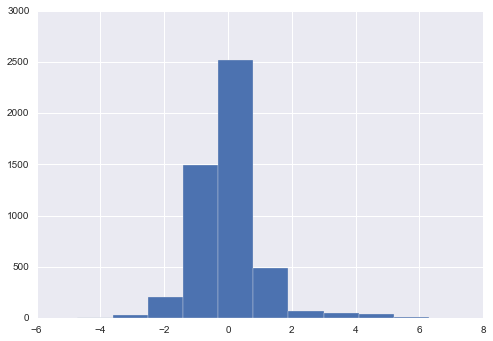

In [17]:
# from sklearn import preprocessing

# plt.hist(preprocessing.scale(q['chlorides']))

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


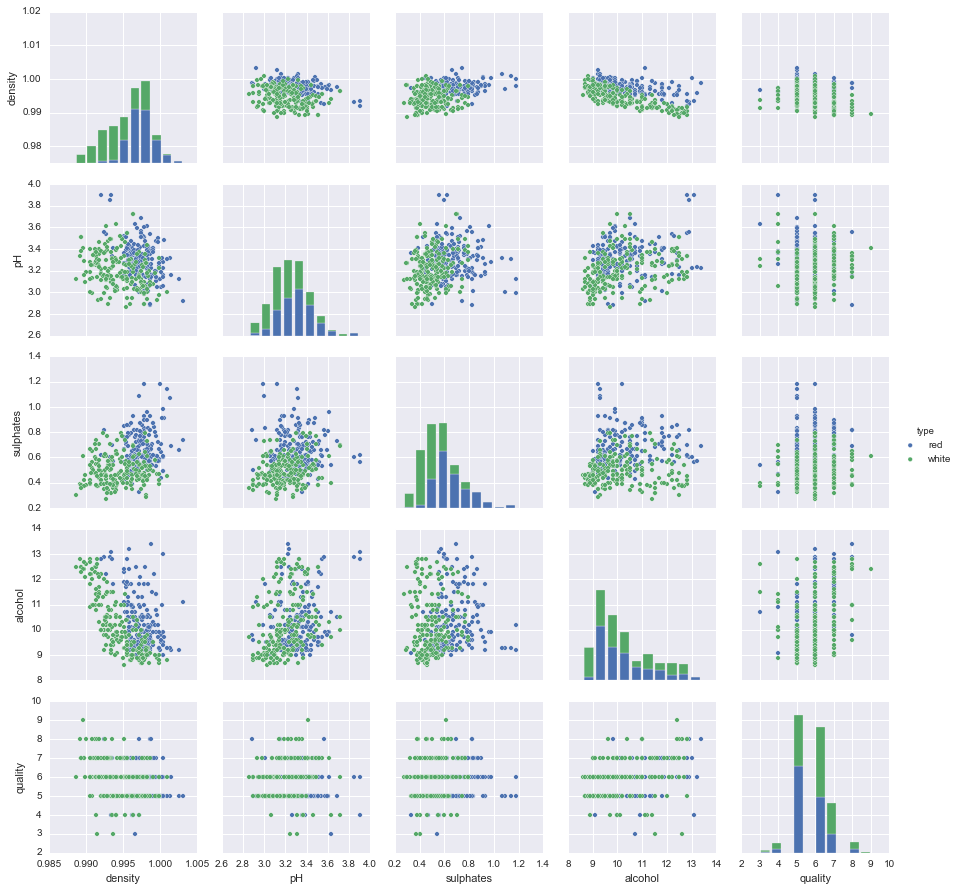

In [35]:
selected = [
    'density',
       'pH', 'sulphates', 'alcohol',
    'quality', 'type'
           ]

sn.pairplot(q[selected], hue="type")

In [185]:
# from sklearn import cross_validation

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(q[trainc], q[targetc], test_size=0.2)

In [195]:
len(q)

6497

In [196]:
len(redqal)

1599

In [198]:
len(redqal)/len(q)

0.2461135908881022

In [541]:
trainc = ['fixed acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'volatile acidity', 'total sulfur dioxide']

targetc = 'quality'

learn_x = q[trainc][:-1599]
learn_y = q[targetc][:-1599]
test_x = q[trainc][-1599:]
test_y = q[targetc][-1599:]

train_x, cv_x, train_y, cv_y = cross_validation.train_test_split(learn_x, learn_y, test_size=0.2)

In [210]:
len(train_x)

3918

In [211]:
from sklearn import svm

In [669]:
clf = svm.SVC(gamma=0.017, C=500, kernel='rbf', class_weight={3: 5, 8: 5, 9:10})
clf.fit(train_x, train_y)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


SVC(C=500, cache_size=200, class_weight={8: 5, 9: 10, 3: 5}, coef0=0.0,
  degree=3, gamma=0.017, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [670]:
y_p = clf.predict(cv_x)
y_t = cv_y

In [671]:
accuracy(y_t, y_p, 1)

Accuracy = 0.9285714285714286


In [672]:
mad(y_p, y_t)

0.46020408163265303

In [673]:
confusion_matrix(y_t, y_p)

array([[  0,   0,   4,   2,   0,   0,   0],
       [  3,   0,  18,  11,   0,   0,   0],
       [  0,   1, 224, 136,   6,   2,   0],
       [  1,   0,  95, 271,  19,  17,   0],
       [  0,   0,   9,  83,  25,  18,   0],
       [  0,   0,   0,  16,  10,   7,   0],
       [  0,   0,   0,   1,   1,   0,   0]])

In [371]:
y_t.min()

3

In [675]:
from sklearn import metrics

In [690]:
metrics.precision_score(y_t, y_p, average='micro')

0.53775510204081634

In [221]:
from sklearn.grid_search import GridSearchCV

In [467]:
model = svm.SVC(class_weight={3: 5, 8: 5, 9:10}, )

param_grid = [ 
    {'C': np.linspace(100, 1000, 4), 'gamma': np.linspace(0.01, 0.02, 4), 'kernel': ['rbf']},
 ]

clf = GridSearchCV(model, param_grid, n_jobs=-1, cv=5, scoring="acc")
clf.fit(learn_x, learn_y)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight={3: 9, 4: 6, 5: 5, 6: 5, 7: 6, 8: 9},
  coef0=0.0, degree=3, gamma=0.0, kernel='rbf', max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'C': array([ 40.     ,  53.33333,  66.66667,  80.     ]), 'kernel': ['rbf'], 'gamma': array([ 0.01   ,  0.01333,  0.01667,  0.02   ])}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [468]:
clf.best_estimator_

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


SVC(C=40.0, cache_size=200, class_weight={3: 9, 4: 6, 5: 5, 6: 5, 7: 6, 8: 9},
  coef0=0.0, degree=3, gamma=0.01, kernel='rbf', max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [469]:
clf.best_params_

{'C': 40.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [470]:
clf.best_score_

0.490812576561862

In [ ]:
trainset, cvset = cross_validation

In [184]:
trainc = ['fixed acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'volatile acidity', 'total sulfur dioxide']

targetc = 'quality'

# train = q.drop([targetc, 'type'], axis=1)[:-800]
train = q[trainc][:-800]
target = q[targetc][:-800]

In [102]:
param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

#TODO: select best parameters, try the svmcv methods

In [186]:
from sklearn import svm
clf = svm.SVC(gamma=0.01, C=80, kernel='rbf')

In [187]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


SVC(C=80, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [166]:
# clf.predict(q[trainc][-20:])

array([5, 5, 5, 5, 6, 6, 5, 5, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6])

In [188]:
# p = q[trainc][-800:]

y_p = clf.predict(X_test)
y_t = y_test #q[targetc][-800:]

In [189]:
accuracy(y_p, y_t, 1)

Accuracy = 0.9576923076923077


In [190]:
mad(y_p, y_t)

0.49615384615384617

In [191]:
clf.predict(X_test[y_t >= 8])   # further improvements

array([6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 5, 7, 6, 6, 6, 6, 7, 6, 6,
       5, 6, 6, 5, 6, 7, 6, 6])

In [192]:
confusion_matrix(y_t, y_p)

array([[  0,   0,   7,   2,   0,   0],
       [  0,   0,  32,  12,   2,   0],
       [  0,   0, 268, 153,   2,   0],
       [  0,   0, 120, 422,  22,   0],
       [  0,   0,   4, 196,  27,   0],
       [  0,   0,   3,  23,   5,   0]])

In [194]:
y_t.min()

3

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
clf = LinearRegression()

In [151]:
clf.fit(train, target)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
clf.predict(q.drop([targetc, 'type'], axis=1)[-20:])

array([ 4.58191991,  5.73517824,  5.73517824,  5.81654738,  5.83039895,
        6.13880044,  5.77124205,  5.7391044 ,  7.18926223,  6.23705258,
        5.40944605,  5.81248905,  6.23426737,  6.11900323,  5.66435989,
        6.21431658,  5.70784219,  5.38349129,  6.63884514,  6.385908  ])

In [153]:
p = q.drop([targetc, 'type'], axis=1)[-800:]

y_p = clf.predict(p)
y_t = q[targetc][-800:]

In [154]:
accuracy(y_p, y_t, 1)

Accuracy = 0.89125


In [155]:
mad(y_p, y_t)

0.5514730327052704

In [112]:
clf.predict(p[y_t == 8])

array([ 6.01067261,  7.06276529,  6.47443444,  5.5300953 ,  5.5300953 ,
        5.5300953 ,  5.5300953 ,  5.5300953 ,  5.5300953 ,  5.5300953 ,
        5.80488185,  5.5300953 ,  6.75331432,  6.48382867,  6.87921868,
        7.07559669,  6.58668999])

In [156]:
y_p = np.round(y_p)
confusion_matrix(y_t, y_p)

array([[  0,   0,   0,   0,   1,   0],
       [  0,   0,  11,   6,   1,   0],
       [  0,   0,  68, 143,   3,   0],
       [  0,   0,  33, 305,  91,   0],
       [  0,   0,   7,  70,  44,   0],
       [  0,   0,   0,  12,   5,   0]])

In [158]:
y_t.min()

3

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
clf = LogisticRegression(C=2)

In [80]:
clf.fit(train, target)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [81]:
clf.predict(q.drop([targetc, 'type'], axis=1)[-20:])

array([5, 5, 5, 6, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 6, 6, 5, 5, 7, 6])

In [82]:
p = q.drop([targetc, 'type'], axis=1)[-800:]

y_p = clf.predict(p)
y_t = q[targetc][-800:]

In [83]:
accuracy(y_p, y_t, 1)

Accuracy = 0.9725


In [84]:
mad(y_p, y_t)

0.46125

In [85]:
clf.predict(p[y_t == 8])

array([6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 7, 6])

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_t, y_p)

array([[  0,   0,   0,   1,   0,   0],
       [  0,   0,  12,   6,   0,   0],
       [  0,   0,  98, 115,   1,   0],
       [  0,   1,  50, 321,  57,   0],
       [  0,   0,   1,  85,  35,   0],
       [  0,   0,   0,  12,   5,   0]])

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
clf = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [178]:
clf.fit(train, target)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=20, p=2, weights='uniform')

In [179]:
clf.predict(q.drop([targetc, 'type'], axis=1)[-20:])

array([5, 5, 5, 6, 5, 6, 5, 5, 7, 7, 5, 6, 6, 6, 6, 6, 5, 6, 7, 6])

In [180]:
p = q.drop([targetc, 'type'], axis=1)[-800:]

y_p = clf.predict(p)
y_t = q[targetc][-800:]

In [181]:
accuracy(y_p, y_t, 1)

Accuracy = 0.94875


In [182]:
mad(y_p, y_t)

0.5725

In [170]:
clf.predict(p[y_t == 8])

array([7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7])

In [ ]:
# Outlier detection algorithms
# feature selection methods
# sensitivity analysis

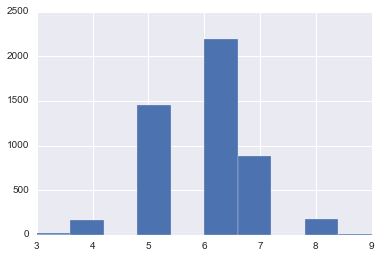

In [73]:
whiteqal[targetc].hist()

In [77]:
whiteqal.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [80]:
y_p = clf.predict(whiteqal[trainc][-20:])
y_t = whiteqal[targetc][-20:]

In [46]:
accuracy(y_p, y_t, 1)

Accuracy = 0.9675


In [36]:
mad(y_p, y_t)

0.4725

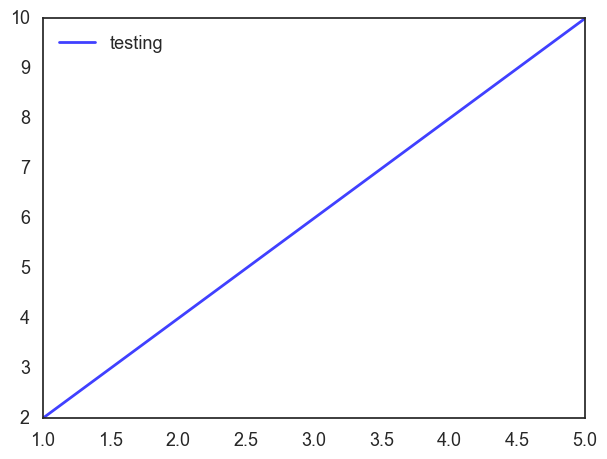

In [76]:
plt.style.use(['classic', 'seaborn-white', 'seaborn-talk'])

plt.figure(figsize=(7, 5), dpi=100)
x = np.array([1,2,3,4,5])
y = x * 2
plt.plot(x, y, linewidth=2, alpha=.75, label='testing')
plt.legend(loc='best')


In [148]:
np.round(5.6)

6.0

In [172]:
len(q)

6497